### Exploration on Insurrection Data
Exploration points covered:
- Frequency of tweets/post _to compare the three sources and see how the discourse buildup in each_
- See proportion of emotions before and after
- See growth of emotions and positive/negative wordcounts
- See top tweeting/posting accounts/subreddit/fb page

## Facebook Data
### 1. Data Loading, Sanity Check (null id and values), and Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

fb_before_df = pd.read_csv (r'../facebook_before_insurrection.csv')
fb_after_df = pd.read_csv (r'../facebook_after_insurrection.csv')

fb_before_df = fb_before_df[fb_before_df['id'].notnull()]
fb_after_df = fb_after_df[fb_after_df['id'].notnull()]

display(fb_before_df[:5])
print("=============================================================")
print("= In total, we have {} Facebook text data before insurrection =".format(len(fb_before_df.index)))
print("=============================================================")

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,1000506650214052020-12-30 12:28:33 EST,2020-12-30T17:28:33.000Z,#WeThePeople #Wednesday! It's 1776 in #America...,AvaAston,0.024356,0.801682,0.008161,0.085327,0.016259,0.007407,...,0.0,0.003704,0,0.000000,0.007407,0.000000,0.000000,0.011111,0.007407,anger
1,1545535447284542020-12-29 19:40:17 EST,2020-12-30T00:40:17.000Z,Jan 6th DC is doing all they can to obstruct J...,WeThePeoplePowerToThePeople,0.006313,0.662385,0.006589,0.267558,0.011515,0.000000,...,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.018868,0.037736,anger
2,3234786609961622020-12-30 06:03:47 EST,2020-12-30T11:03:47.000Z,#Constitution #January6 #PenceCard #VP ...,ToddHuffShow,0.024881,0.030911,0.009514,0.206930,0.017511,0.000000,...,0.0,0.023256,0,0.023256,0.116279,0.023256,0.000000,0.023256,0.023256,disgust
3,3464930026717832020-12-29 22:44:13 EST,2020-12-30T03:44:13.000Z,Write your favorite or most blatant lie in the...,impracticalpolitics,0.008752,0.055451,0.011534,0.810325,0.009027,0.000000,...,0.0,0.065789,0,0.013158,0.052632,0.026316,0.013158,0.052632,0.078947,disgust
4,16879183781279432020-12-30 08:48:20 EST,2020-12-30T13:48:20.000Z,🇺🇸🦅 Hey patriots Sorry for the delay in upda...,Patriotic Army of Deplorables,0.052600,0.004436,0.017669,0.026939,0.030055,0.000000,...,0.0,0.042105,0,0.010526,0.052632,0.010526,0.000000,0.063158,0.052632,joy


= In total, we have 31591 Facebook text data before insurrection =


In [2]:
display(fb_after_df[:5])
print("=============================================================")
print("= In total, we have {} Facebook text data after insurrection =".format(len(fb_after_df.index)))
print("=============================================================")

,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,1404662634924072021-01-06 18:32:08 EST,2021-01-06T23:32:08.000Z,DO NOT GET DISCOURAGED! Do not lose your angry...,Hirstified,0.008195,0.858081,0.005055,0.086841,0.012784,0.015152,...,0.0,0.000000,0,0.045455,0.045455,0.030303,0.015152,0.060606,0.106061,anger
1,9856088548619792021-01-06 18:41:15 EST,2021-01-06T23:41:15.000Z,👇👇👇 ‎'‎My Theory President Trump let this go t...,Women United For Trump,0.051892,0.028418,0.009968,0.261281,0.010671,0.014493,...,0.0,0.014493,0,0.043478,0.043478,0.028986,0.014493,0.057971,0.101449,disgust
2,8179096316194592021-01-05 19:16:49 EST,2021-01-06T00:16:49.000Z,This is a re-share of a post Do you remember...,Fuck Joe Biden,0.005128,0.607457,0.006004,0.342233,0.007114,0.031746,...,0.0,0.047619,0,0.000000,0.031746,0.000000,0.047619,0.095238,0.111111,anger
3,4157464121793692021-01-06 18:39:49 EST,2021-01-06T23:39:49.000Z,👇👇👇 ‎'‎My Theory President Trump let this go t...,We're Proud to Be Deplorables!,0.051892,0.028418,0.009968,0.261281,0.010671,0.014493,...,0.0,0.014493,0,0.043478,0.043478,0.028986,0.014493,0.057971,0.101449,disgust
4,1168244411672021-01-06 18:39:32 EST,2021-01-06T23:39:32.000Z,👇👇👇 ‎'‎My Theory President Trump let this go t...,Louisiana Federation of Republican Women,0.051892,0.028418,0.009968,0.261281,0.010671,0.014493,...,0.0,0.014493,0,0.043478,0.043478,0.028986,0.014493,0.057971,0.101449,disgust


= In total, we have 31929 Facebook text data after insurrection =


### 2. Statistical analysis overview and boxplot for numerical value

In [3]:
print("Facebook data before insurrection:")
fb_before_df.describe()

Facebook data before insurrection:


,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,liwc.negemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,31591.000000,31591.000000,31591.000000,31591.000000,31591.000000,31591.000000,31591.000000,31591.000000,31591.000000,31591.000000,...,31591.000000,31591.000000,31591.000000,31591.0,31591.000000,31591.000000,31591.000000,31591.000000,31591.000000,31591.000000
mean,0.055862,0.089019,0.013441,0.253303,0.048515,0.026442,0.054239,0.009168,0.037715,0.029356,...,0.000491,0.001246,0.061398,0.0,0.021816,0.043646,0.014155,0.010743,0.089850,0.067071
std,0.127766,0.190677,0.028114,0.264553,0.113676,0.026769,0.044157,0.017486,0.032980,0.030973,...,0.003397,0.005303,0.043184,0.0,0.024392,0.037437,0.020716,0.020318,0.048628,0.042379
min,0.003964,0.003603,0.003022,0.004259,0.003936,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001011,0.001577
25%,0.010603,0.007590,0.008680,0.047895,0.011670,0.000000,0.026316,0.000000,0.016129,0.000000,...,0.000000,0.000000,0.032258,0.0,0.000000,0.013158,0.000000,0.000000,0.055319,0.035714
50%,0.024125,0.014570,0.011331,0.113639,0.020408,0.023256,0.044776,0.000000,0.033040,0.024390,...,0.000000,0.000000,0.055556,0.0,0.018182,0.040000,0.005420,0.000000,0.084337,0.058824
75%,0.041761,0.051593,0.014367,0.436231,0.036450,0.041667,0.072727,0.012500,0.050000,0.042553,...,0.000000,0.000000,0.085714,0.0,0.033333,0.066667,0.022222,0.015625,0.111111,0.086957
max,0.920972,0.897543,0.951496,0.853472,0.949882,0.280000,0.363636,0.333333,0.333333,0.333333,...,0.105263,0.200000,0.500000,0.0,0.333333,0.320000,0.285714,0.187500,0.444444,0.500000


In [4]:
print("Facebook data after insurrection:")
fb_after_df.describe()

Facebook data after insurrection:


,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,liwc.negemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000,...,31929.000000,31929.000000,31929.000000,31929.0,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000,31929.000000
mean,0.050712,0.111495,0.021702,0.291009,0.042124,0.035089,0.045341,0.008691,0.038026,0.041382,...,0.000972,0.001624,0.064726,0.0,0.019168,0.045368,0.015538,0.012510,0.089121,0.079408
std,0.120243,0.214712,0.076942,0.269803,0.109668,0.031373,0.039253,0.016680,0.032788,0.035003,...,0.004925,0.006729,0.046742,0.0,0.022022,0.036571,0.022549,0.019321,0.048699,0.046048
min,0.004090,0.003117,0.003128,0.004594,0.003492,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.001233,0.001901
25%,0.008566,0.008399,0.008989,0.057835,0.010200,0.007752,0.019444,0.000000,0.016667,0.017241,...,0.000000,0.000000,0.032698,0.0,0.000000,0.017544,0.000000,0.000000,0.052632,0.045455
50%,0.020745,0.020940,0.011646,0.172467,0.017778,0.032258,0.038462,0.000000,0.033333,0.036585,...,0.000000,0.000000,0.058824,0.0,0.014957,0.042553,0.007752,0.000000,0.083333,0.071429
75%,0.035779,0.076258,0.015279,0.512528,0.031225,0.051852,0.063492,0.011905,0.052632,0.058824,...,0.000000,0.000000,0.088235,0.0,0.030769,0.067797,0.022727,0.019608,0.115789,0.103704
max,0.922674,0.897538,0.955061,0.852334,0.950096,0.250000,0.428571,0.285714,0.333333,0.400000,...,0.122449,0.166667,0.428571,0.0,0.200000,0.363636,0.400000,0.300000,0.500000,0.600000


Text(0.5, 1.0, 'Facebook data after insurrection (numerical features)')

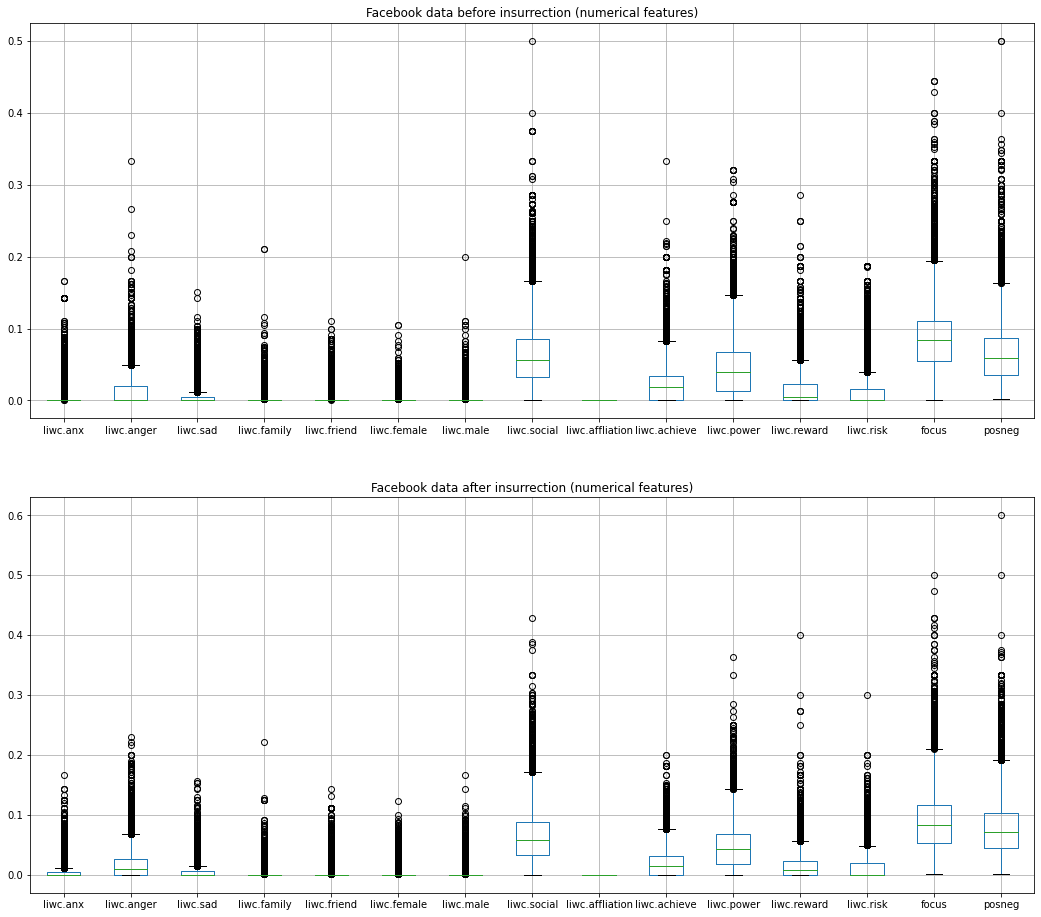

In [5]:
f, ax = plt.subplots(2, figsize=(18, 16))
plt.subplot(2,1,1)
boxplot = fb_before_df.boxplot(column=fb_before_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot.set_title("Facebook data before insurrection (numerical features)")

plt.subplot(2,1,2)
boxplot2 = fb_after_df.boxplot(column=fb_after_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot2.set_title("Facebook data after insurrection (numerical features)")

### 3. Frequency of post over time

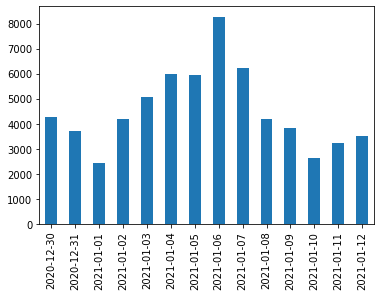

In [6]:
#add new date column
fb_before_df['date_column'] = pd.to_datetime(fb_before_df['created_at']).dt.date
fb_after_df['date_column'] = pd.to_datetime(fb_after_df['created_at']).dt.date

#check posting frequency
date_agg_before = fb_before_df['date_column'].value_counts(sort = False)
date_agg_after = fb_after_df['date_column'].value_counts(sort = False)

fb_date_agg_all = date_agg_before.add(date_agg_after,fill_value=0)

fb_date_plot = fb_date_agg_all.plot(kind='bar')

We can see that the posts in Facebook around the insurrection peaked on the day of insurrection itself (January 6th)

### 4. Emotion (category data) share

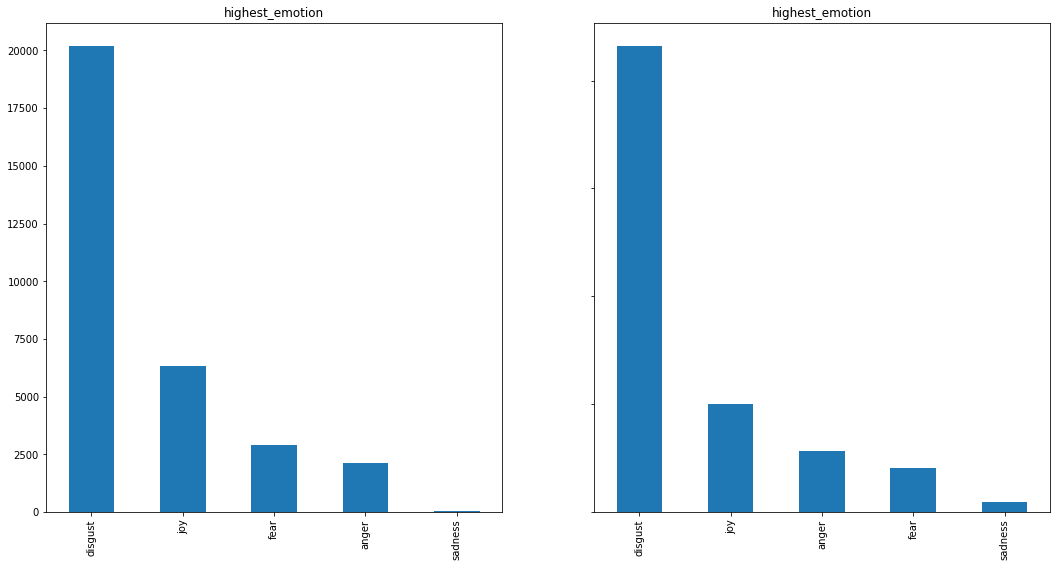

In [41]:
#check most common emotion before the insurrection

f, ax = plt.subplots(1,2, figsize=(18, 9))

plt.subplot(1,2,1)
before_emotion_count = fb_before_df['highest_emotion'].value_counts(sort = True)
before_emotion_plot = before_emotion_count.plot(kind='bar', subplots = True, sharey = True)

plt.subplot(1,2,2)
after_emotion_count = fb_after_df['highest_emotion'].value_counts(sort = True)
after_emotion_plot = after_emotion_count.plot(kind='bar', subplots = True, sharey = True)



Both before and after the insurrection, disgust is the most common emotion shown in these posts.

### 5. Emotion values over time

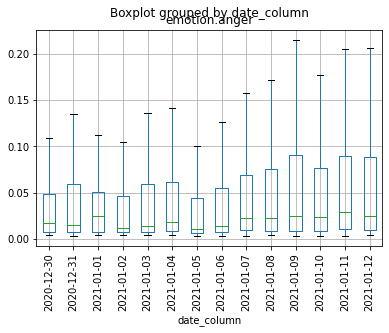

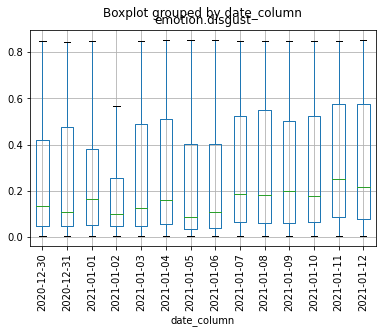

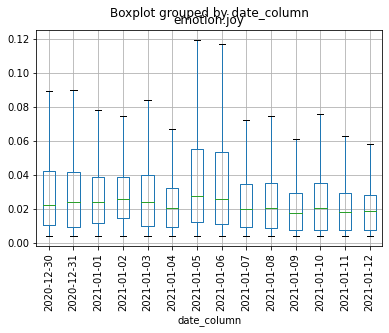

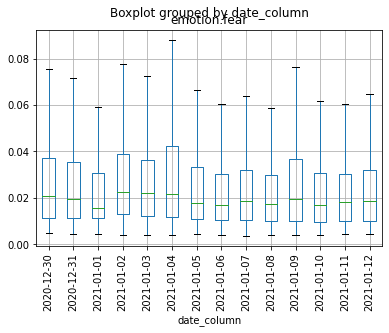

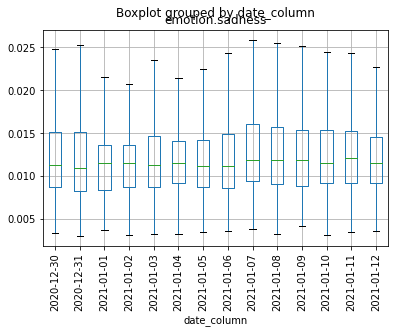

In [8]:
#check growth of each emotions per date

df_all_fb = [fb_after_df,fb_before_df]
df_all_fb = pd.concat(df_all_fb)

boxplot_anger = df_all_fb.boxplot(column='emotion.anger', by='date_column', showfliers=False, rot=90, layout = (1,1))
boxplot_disgust = df_all_fb.boxplot(column='emotion.disgust', by='date_column', showfliers=False, rot=90, layout = (1,1))
boxplot_joy = df_all_fb.boxplot(column='emotion.joy', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_fear = df_all_fb.boxplot(column='emotion.fear', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_sadness = df_all_fb.boxplot(column='emotion.sadness', by='date_column', return_type='axes', showfliers=False, rot=90)

From the box plot we can see that emotion values fluctuate before and after the insurrection. Anger and disgust in posts show a slight increase after the insurrection, there's a peak in joy during the insurrection, while there's no discernible patterns for fear and sadness.


### 6. Most frequent posting accounts

In [9]:
#most common tweeting account
df_all_fb['author_id'].value_counts().head()

United Conservatives For America      166
TrumpBookUSA                          123
Canadians against TRUMP !   :)  :)    119
Malcolm Nance Fans                    117
FOX NEWS with Tucker Carlson          117
Name: author_id, dtype: int64

### 7. Occurrence of negative and positive sayings

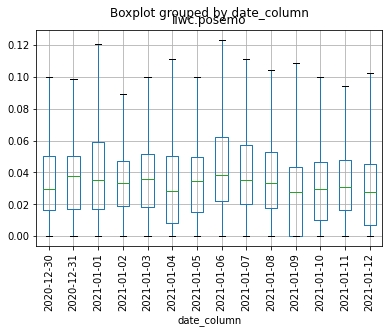

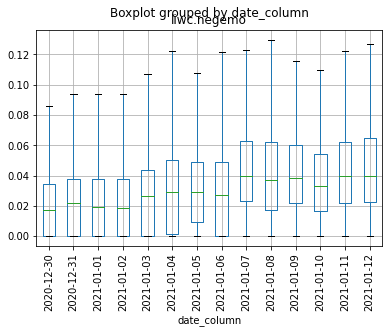

In [10]:
#occurrence of positive words
boxplot_positive = df_all_fb.boxplot(column='liwc.posemo', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_negative = df_all_fb.boxplot(column='liwc.negemo', by='date_column', return_type='axes', showfliers=False, rot=90)

We can see that appearance of negative emotion words increased after the insurrection while no discernible pattern for appearance of positive emotion words

## Reddit Data
### 1. Data Loading, Sanity Check (null id and values), and Overview

In [11]:
#check posting frequency (reddit)

rd_before_df = pd.read_csv (r'../reddit_before_insurrection.csv')
rd_after_df = pd.read_csv (r'../reddit_after_insurrection.csv')

rd_before_df = rd_before_df[rd_before_df['id'].notnull()]
rd_after_df = rd_after_df[rd_after_df['id'].notnull()]

display(rd_before_df[:5])
print("=============================================================")
print("= In total, we have {} Reddit text data before insurrection =".format(len(rd_before_df.index)))
print("=============================================================")

display(rd_after_df[:5])
print("=============================================================")
print("= In total, we have {} Reddit text data after insurrection =".format(len(rd_after_df.index)))
print("=============================================================")


,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,knchjo/r/AnythingGoesNews/comments/knchjo/mcco...,2020-12-30T22:32:44.000Z,McConnell says bill to increase stimulus check...,DippyHippy420,0.062456,0.006078,0.010276,0.016254,0.153405,0.065728,...,0.0,0.075117,0,0.009390,0.028169,0.014085,0.009390,0.122066,0.037559,fear
1,kncgib/r/AnythingGoesNews/comments/kncgib/klob...,2020-12-30T22:31:14.000Z,Klobuchar Rips Hawley over Plan to Object to E...,DippyHippy420,0.006863,0.233904,0.007625,0.673464,0.007914,0.046512,...,0.0,0.034884,0,0.034884,0.058140,0.000000,0.011628,0.093023,0.011628,disgust
2,knbxb9/r/donaldtrump/comments/knbxb9/ga_electi...,2020-12-30T22:03:01.000Z,GA Election Fraud Facts don’t care about your ...,therightisthenewleft,0.024487,0.022667,0.011673,0.258339,0.019259,0.000000,...,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.181818,0.181818,disgust
3,knbncl/r/conservatives/comments/knbncl/house_f...,2020-12-30T21:48:51.000Z,House Freedom Caucus Chairman Andy Biggs prais...,guanaco55,0.163099,0.005904,0.007518,0.038903,0.008028,0.076923,...,0.0,0.076923,0,0.076923,0.000000,0.000000,0.000000,0.076923,0.115385,joy
4,knbmrk/r/The_Chocker/comments/knbmrk/trump_tea...,2020-12-30T21:47:58.000Z,Trump Team aim to present specific evidence on...,therightisthenewleft,0.033285,0.009088,0.007541,0.073260,0.028193,0.071651,...,0.0,0.080997,0,0.021807,0.065421,0.006231,0.003115,0.112150,0.006231,disgust


= In total, we have 10029 Reddit text data before insurrection =


,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,ks0ml5/r/u_wilkinsonknaggs1/comments/ks0ml5/fa...,2021-01-06T23:57:07.000Z,Facebook gets rid of video of Trump's wrong el...,wilkinsonknaggs1,0.012391,0.065788,0.012738,0.573780,0.018593,0.000000,...,0.0,0.000000,0,0.000000,0.000000,0.117647,0.117647,0.117647,0.117647,disgust
1,ks0m5t/r/sugarland/comments/ks0m5t/troy_nehls_...,2021-01-06T23:56:25.000Z,Troy Nehls on Facebook - 4:30 pm January 5 2...,Beelzabub,0.079106,0.006301,0.009118,0.034472,0.020578,0.012987,...,0.0,0.077922,0,0.012987,0.025974,0.000000,0.012987,0.064935,0.038961,joy
2,ks0gd3/r/changemyview/comments/ks0gd3/cmv_a_go...,2021-01-06T23:47:57.000Z,CMV: A Good Way to Lessen the Effect of Electi...,cheetah2013a,0.034900,0.007224,0.009075,0.044010,0.022453,0.047619,...,0.0,0.042328,0,0.031746,0.047619,0.042328,0.005291,0.116402,0.042328,disgust
3,ks0ch1/r/MakeNudityLegal/comments/ks0ch1/the_g...,2021-01-06T23:42:21.000Z,The government doesn't represent us as a peopl...,VTXGaming,0.018364,0.030987,0.009741,0.296299,0.023842,0.057143,...,0.0,0.157143,0,0.014286,0.114286,0.014286,0.014286,0.214286,0.128571,disgust
4,ks08rb/r/KickCCPfromCanada/comments/ks08rb/was...,2021-01-06T23:37:20.000Z,Washington DC Capitol Police execute a Trump s...,[deleted],0.020188,0.029875,0.028422,0.313793,0.033153,0.037037,...,0.0,0.000000,0,0.000000,0.000000,0.000000,0.000000,0.111111,0.222222,disgust


= In total, we have 21553 Reddit text data after insurrection =


### 2. Statistical analysis overview and boxplot for numerical value

In [12]:
print("Reddit data before insurrection:")
rd_before_df.describe()

Reddit data before insurrection:


,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,liwc.negemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,...,10029.000000,10029.000000,10029.000000,10029.0,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000,10029.000000
mean,0.021901,0.141438,0.013264,0.383727,0.025616,0.033511,0.074580,0.009080,0.043877,0.048985,...,0.000796,0.002739,0.067293,0.0,0.023437,0.040992,0.020003,0.016059,0.117171,0.092862
std,0.052719,0.231651,0.028087,0.301257,0.064071,0.040031,0.060679,0.021059,0.043634,0.049232,...,0.005799,0.011391,0.054253,0.0,0.033819,0.043360,0.033390,0.026974,0.075363,0.063058
min,0.003824,0.003284,0.004034,0.004852,0.004384,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002203,0.003247
25%,0.005860,0.009265,0.009218,0.071837,0.008005,0.000000,0.023810,0.000000,0.009259,0.009259,...,0.000000,0.000000,0.036364,0.0,0.000000,0.004762,0.000000,0.000000,0.064516,0.046512
50%,0.012554,0.039070,0.011673,0.330538,0.016328,0.024194,0.066667,0.000000,0.035714,0.038462,...,0.000000,0.000000,0.055556,0.0,0.007519,0.031250,0.000000,0.008065,0.111111,0.083333
75%,0.027782,0.129697,0.013612,0.706698,0.024623,0.053892,0.108108,0.008621,0.066667,0.071429,...,0.000000,0.000000,0.096774,0.0,0.037500,0.064516,0.030612,0.021277,0.162162,0.125000
max,0.909914,0.897373,0.953387,0.851750,0.949768,0.375000,0.444444,0.333333,0.437500,0.416667,...,0.142857,0.200000,0.500000,0.0,0.375000,0.421053,0.500000,0.333333,0.500000,0.500000


In [13]:
print("Reddit data after insurrection:")
rd_after_df.describe()

Reddit data after insurrection:


,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,liwc.negemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,...,21553.000000,21553.000000,21553.000000,21553.0,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000,21553.000000
mean,0.021713,0.180288,0.015644,0.421872,0.023194,0.045543,0.077541,0.010255,0.047285,0.066569,...,0.001138,0.003345,0.076914,0.0,0.023780,0.047706,0.023542,0.018686,0.133340,0.113854
std,0.063523,0.259594,0.047495,0.289099,0.061677,0.043677,0.057209,0.021930,0.042147,0.055429,...,0.007170,0.012175,0.056534,0.0,0.031583,0.043398,0.034630,0.029178,0.068705,0.064449
min,0.003889,0.003446,0.003073,0.004625,0.003850,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.002874,0.002119
25%,0.005514,0.015703,0.008733,0.123876,0.007265,0.000000,0.037736,0.000000,0.015152,0.028090,...,0.000000,0.000000,0.037037,0.0,0.000000,0.005495,0.000000,0.000000,0.085366,0.067073
50%,0.009332,0.053678,0.011377,0.414027,0.012277,0.039216,0.069767,0.000000,0.041667,0.057143,...,0.000000,0.000000,0.070312,0.0,0.014599,0.042857,0.012517,0.006897,0.125000,0.103448
75%,0.021288,0.201881,0.014279,0.721172,0.021845,0.066667,0.108108,0.012195,0.067568,0.093750,...,0.000000,0.000000,0.106780,0.0,0.037037,0.072464,0.034483,0.027778,0.171429,0.147982
max,0.919535,0.898210,0.954457,0.852722,0.949698,0.400000,0.500000,0.333333,0.428571,0.500000,...,0.285714,0.200000,0.500000,0.0,0.333333,0.388889,0.500000,0.400000,0.555556,0.545455


Text(0.5, 1.0, 'Reddit data after insurrection (numerical features)')

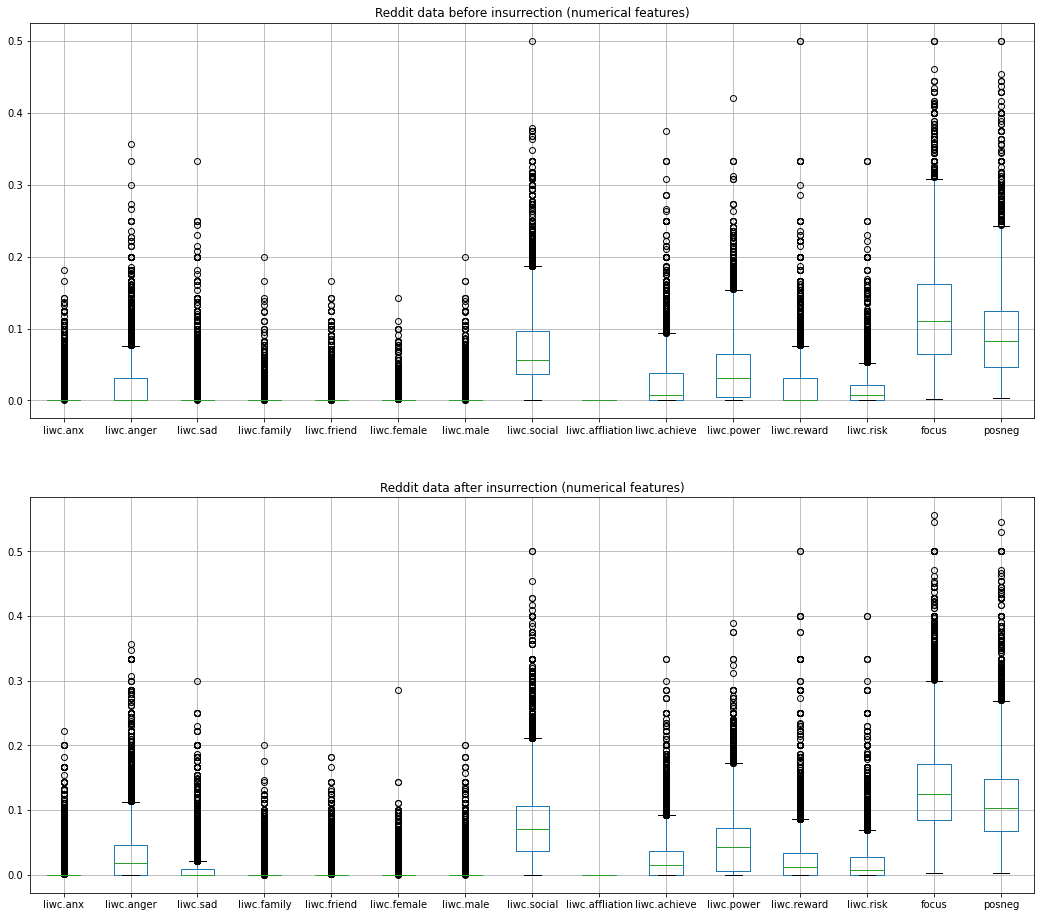

In [38]:
f, ax = plt.subplots(2, figsize=(18, 16))
plt.subplot(2,1,1)
boxplot = rd_before_df.boxplot(column=rd_before_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot.set_title("Reddit data before insurrection (numerical features)")

plt.subplot(2,1,2)
boxplot2 = rd_after_df.boxplot(column=rd_after_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot2.set_title("Reddit data after insurrection (numerical features)")

### 3. Frequency of post over time

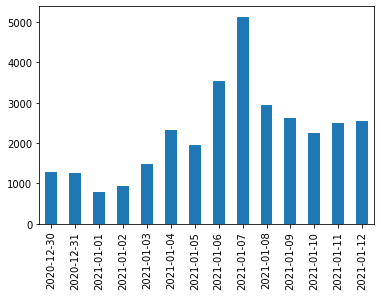

In [14]:

df_all_rd = [rd_before_df,rd_after_df]
df_all_rd = pd.concat(df_all_rd)
df_all_rd['date_column'] = pd.to_datetime(df_all_rd['created_at']).dt.date
rd_freq = df_all_rd['date_column'].value_counts(sort = False)
date_plot = rd_freq.plot(kind='bar')

We can see that the posts in Reddit around the insurrection peaked on the day after the insurrection (January 7th).

### 4. Emotion (category data) share

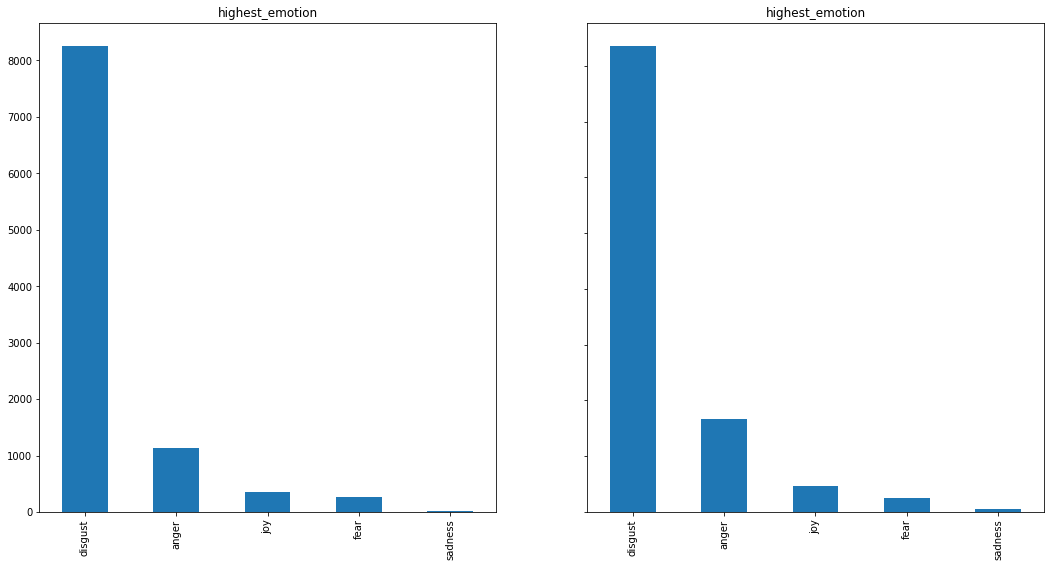

In [40]:
f, ax = plt.subplots(1,2, figsize=(18, 9))

plt.subplot(1,2,1)
before_emotion_count = rd_before_df['highest_emotion'].value_counts(sort = True)
before_emotion_plot = before_emotion_count.plot(kind='bar', subplots = True, sharey = True)

plt.subplot(1,2,2)
after_emotion_count = rd_after_df['highest_emotion'].value_counts(sort = True)
after_emotion_plot = after_emotion_count.plot(kind='bar', subplots = True, sharey = True)


Both before and after the insurrection, disgust is the most common emotion shown in these posts. We can see also more post showing anger after the insurrection in Reddit

### 5. Emotion values over time

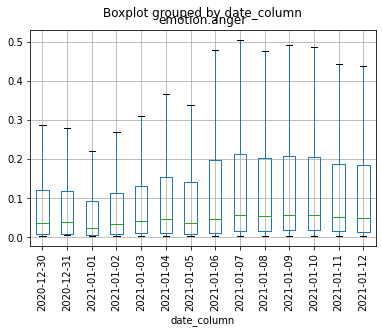

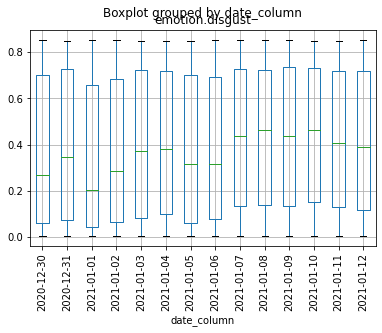

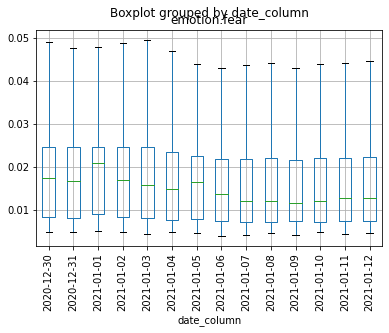

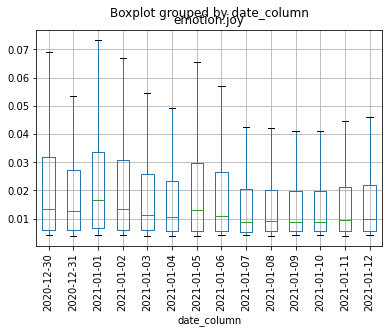

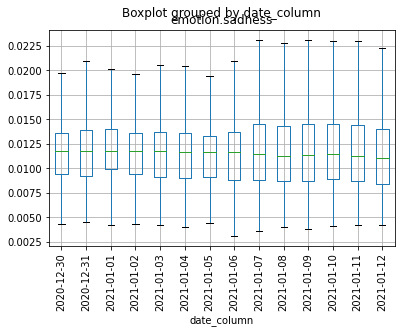

In [42]:
#check growth of each emotions per date (reddit)

boxplot_anger = df_all_rd.boxplot(column='emotion.anger', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_disgust = df_all_rd.boxplot(column='emotion.disgust', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_fear = df_all_rd.boxplot(column='emotion.fear', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_joy = df_all_rd.boxplot(column='emotion.joy', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_sadness = df_all_rd.boxplot(column='emotion.sadness', by='date_column', return_type='axes', showfliers=False, rot=90)

From the box plot we can see that emotion values fluctuate before and after the insurrection. Disgust in posts show a slight increase after the insurrection, there's a decrease of both fear, joy and sadness (albeit slightly on sadness) after the insurrection, 


### 6. Most common posting accounts

In [22]:
#most common subreddit
df_all_rd['subreddit']=df_all_rd['id'].str.split('/').str[2]
df_all_rd['subreddit'].value_counts().head()

politics                 6260
donaldtrump              2335
conspiracy               1488
news                      981
PoliticalCompassMemes     705
Name: subreddit, dtype: int64

### 7. Occurrence of negative and positive sayings

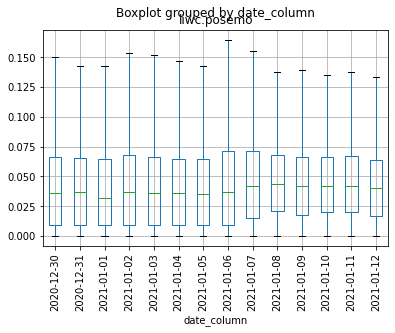

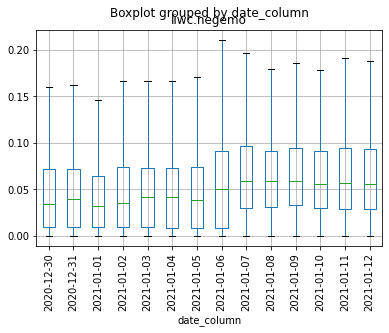

In [43]:
#occurrence of positive words
boxplot_positive = df_all_rd.boxplot(column='liwc.posemo', by='date_column', return_type='axes', showfliers=False, rot=90)
#occurrence of negative words
boxplot_negative = df_all_rd.boxplot(column='liwc.negemo', by='date_column', return_type='axes', showfliers=False, rot=90)

We can see that appearance of negative emotion words increased after the insurrection while no discernible pattern for appearance of positive emotion words

## Twitter Data
### 1. Data Loading, Sanity Check (null id and values), and Overview


In [45]:
#check posting frequency (twitter)

tw_before_df = pd.read_csv (r'../twitter_before_insurrection.csv')
tw_after_df = pd.read_csv (r'../twitter_after_insurrection.csv')

tw_before_df = tw_before_df[tw_before_df['id'].notnull()]
tw_after_df  = tw_after_df[tw_after_df ['id'].notnull()]


display(tw_before_df[:5])
print("=============================================================")
print("= In total, we have {} Twitter text data before insurrection =".format(len(tw_before_df.index)))
print("=============================================================")

display(tw_after_df[:5])
print("=============================================================")
print("= In total, we have {} Twitter text data after insurrection =".format(len(tw_after_df.index)))
print("=============================================================")


,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,1344432929456402437,2020-12-30T23:59:23.000Z,Its more about betraying the American ppl. Tho...,RisingJup (JupRising),0.004719,0.768909,0.007272,0.191707,0.006664,0.05,...,0.0,0.100000,0,0.0,0.000000,0.000000,0.000000,0.250000,0.050000,anger
1,1344432663055261696,2020-12-30T23:58:19.000Z,@ScottPresler @realDonaldTrump If it’s a massi...,LorainJane (mena serafina),0.585056,0.008111,0.012859,0.019512,0.007441,0.00,...,0.0,0.000000,0,0.0,0.166667,0.000000,0.000000,0.166667,0.333333,joy
2,1344432660215701510,2020-12-30T23:58:19.000Z,@LaBohemista @grego_great @GWooJunior @POCG9 @...,VenerAbility (Dr. Ellen Brandt),0.771731,0.006115,0.004077,0.012909,0.005504,0.00,...,0.0,0.000000,0,0.0,0.000000,0.034483,0.000000,0.034483,0.034483,joy
3,1344432630511624192,2020-12-30T23:58:12.000Z,@ScottPresler @realDonaldTrump You totally mis...,GritXu (Grit Xu),0.025037,0.034125,0.014052,0.160433,0.033982,0.00,...,0.0,0.000000,0,0.0,0.100000,0.000000,0.000000,0.200000,0.300000,disgust
4,1344431920868941824,2020-12-30T23:55:22.000Z,I don't care the political party let's stand...,mrsrdc1 (Katie),0.021394,0.035315,0.012714,0.262147,0.025295,0.00,...,0.0,0.117647,0,0.0,0.117647,0.000000,0.058824,0.117647,0.235294,disgust


= In total, we have 187008 Twitter text data before insurrection =


,id,created_at,text,author_id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,...,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg,highest_emotion
0,1346969795963412484,2021-01-06T23:59:59.000Z,WHAT THE MSM IS IGNORING Just as it ignored t...,themavennews (MAVEN NEWS),0.004509,0.626695,0.008703,0.332686,0.006505,0.041667,...,0.0,0.000000,0,0.0,0.000000,0.000000,0.083333,0.125000,0.166667,anger
1,1346969795179270144,2021-01-06T23:59:59.000Z,@RadioFreeTom Yes he did he said that it’s u...,ColinTh52477777 (Colin Thomson),0.012494,0.244834,0.008475,0.552972,0.011384,0.058824,...,0.0,0.176471,0,0.0,0.000000,0.176471,0.117647,0.235294,0.117647,disgust
2,1346969778989244417,2021-01-06T23:59:55.000Z,Hundreds of President Trump supporters gathere...,GabiDunham (Gabi Dunham FOX 47),0.177664,0.010512,0.045390,0.043291,0.014852,0.000000,...,0.0,0.047619,0,0.0,0.000000,0.000000,0.000000,0.047619,0.095238,joy
3,1346969773020753929,2021-01-06T23:59:54.000Z,@SenHydeSmith @CapitolPolice Take a look at th...,joenors (Joenors@mail.Com),0.048186,0.005166,0.009513,0.031594,0.021016,0.000000,...,0.0,0.095238,0,0.0,0.095238,0.095238,0.000000,0.190476,0.285714,joy
4,1346969746260979712,2021-01-06T23:59:47.000Z,@GOPLeader You're right we should stop the ste...,lee_3po (🇺🇲 American Patriot),0.006675,0.890417,0.006288,0.057288,0.012210,0.000000,...,0.0,0.142857,0,0.0,0.000000,0.142857,0.142857,0.142857,0.142857,anger


= In total, we have 252984 Twitter text data after insurrection =


### 2. Statistical analysis overview and boxplot for numerical value

In [46]:
print("Facebook data before insurrection:")
tw_before_df.describe()

Facebook data before insurrection:


,id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,1.870080e+05,187008.000000,187008.000000,187008.000000,187008.000000,187008.000000,187008.000000,187008.000000,187008.000000,187008.000000,...,187008.000000,187008.000000,187008.000000,187008.0,187008.000000,187008.000000,187008.000000,187008.000000,187008.000000,187008.000000
mean,1.345525e+18,0.029707,0.258816,0.014613,0.421929,0.022935,0.036795,0.086719,0.011278,0.055534,...,0.000848,0.003249,0.064931,0.0,0.028815,0.045355,0.023199,0.016964,0.134792,0.118738
std,7.029989e+14,0.101046,0.299805,0.044246,0.280871,0.066917,0.048881,0.069954,0.029080,0.060134,...,0.007353,0.014922,0.066880,0.0,0.044030,0.053559,0.041191,0.034529,0.077010,0.070814
min,1.344071e+18,0.003658,0.003426,0.003173,0.004272,0.003674,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.020408,0.020408
25%,1.344997e+18,0.005107,0.029038,0.007855,0.138573,0.007020,0.000000,0.041667,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.076923,0.066667
50%,1.345717e+18,0.006817,0.099591,0.010615,0.415064,0.009942,0.000000,0.076923,0.000000,0.045455,...,0.000000,0.000000,0.050000,0.0,0.000000,0.038462,0.000000,0.000000,0.120000,0.100000
75%,1.346109e+18,0.017156,0.456731,0.013895,0.706572,0.019811,0.062500,0.125000,0.000000,0.083333,...,0.000000,0.000000,0.100000,0.0,0.050000,0.076923,0.041667,0.032258,0.173913,0.153846
max,1.346607e+18,0.923147,0.898402,0.954524,0.854023,0.950043,0.666667,1.000000,0.666667,1.000000,...,0.500000,0.354839,1.000000,0.0,0.500000,0.500000,0.666667,0.500000,1.000000,1.000000


In [47]:
print("Facebook data after insurrection:")
tw_after_df.describe()

Facebook data after insurrection:


,id,emotion.joy,emotion.anger,emotion.sadness,emotion.disgust,emotion.fear,liwc.focuspast,liwc.focuspresent,liwc.focusfuture,liwc.posemo,...,liwc.female,liwc.male,liwc.social,liwc.affliation,liwc.achieve,liwc.power,liwc.reward,liwc.risk,focus,posneg
count,2.529840e+05,252984.000000,252984.000000,252984.000000,252984.000000,252984.000000,252984.000000,252984.000000,252984.000000,252984.000000,...,252984.000000,252984.000000,252984.000000,252984.0,252984.000000,252984.000000,252984.000000,252984.000000,252984.000000,252984.000000
mean,1.347618e+18,0.021402,0.289205,0.016441,0.440453,0.019508,0.047621,0.080020,0.010481,0.052854,...,0.000987,0.003159,0.072165,0.0,0.024929,0.046582,0.022796,0.018938,0.138123,0.129877
std,7.292794e+14,0.077280,0.307045,0.057445,0.277976,0.060637,0.054039,0.068919,0.028051,0.057052,...,0.007874,0.014506,0.069626,0.0,0.041063,0.054480,0.040671,0.036270,0.077945,0.073902
min,1.346607e+18,0.003720,0.002904,0.002803,0.004181,0.003581,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.016667,0.020833
25%,1.346971e+18,0.005029,0.038749,0.007845,0.158949,0.006695,0.000000,0.037037,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.080000,0.076923
50%,1.347383e+18,0.006130,0.129753,0.010509,0.454098,0.008710,0.041667,0.071429,0.000000,0.043478,...,0.000000,0.000000,0.060606,0.0,0.000000,0.040000,0.000000,0.000000,0.125000,0.115385
75%,1.348226e+18,0.013632,0.545175,0.013734,0.719218,0.016004,0.076923,0.117647,0.000000,0.083333,...,0.000000,0.000000,0.111111,0.0,0.045455,0.076923,0.041667,0.038462,0.181818,0.166667
max,1.349144e+18,0.924552,0.898817,0.954914,0.856633,0.950485,1.000000,1.000000,1.000000,1.000000,...,0.285714,0.400000,0.666667,0.0,1.000000,0.500000,1.000000,0.500000,2.000000,1.000000


Text(0.5, 1.0, 'Twitter data after insurrection (numerical features)')

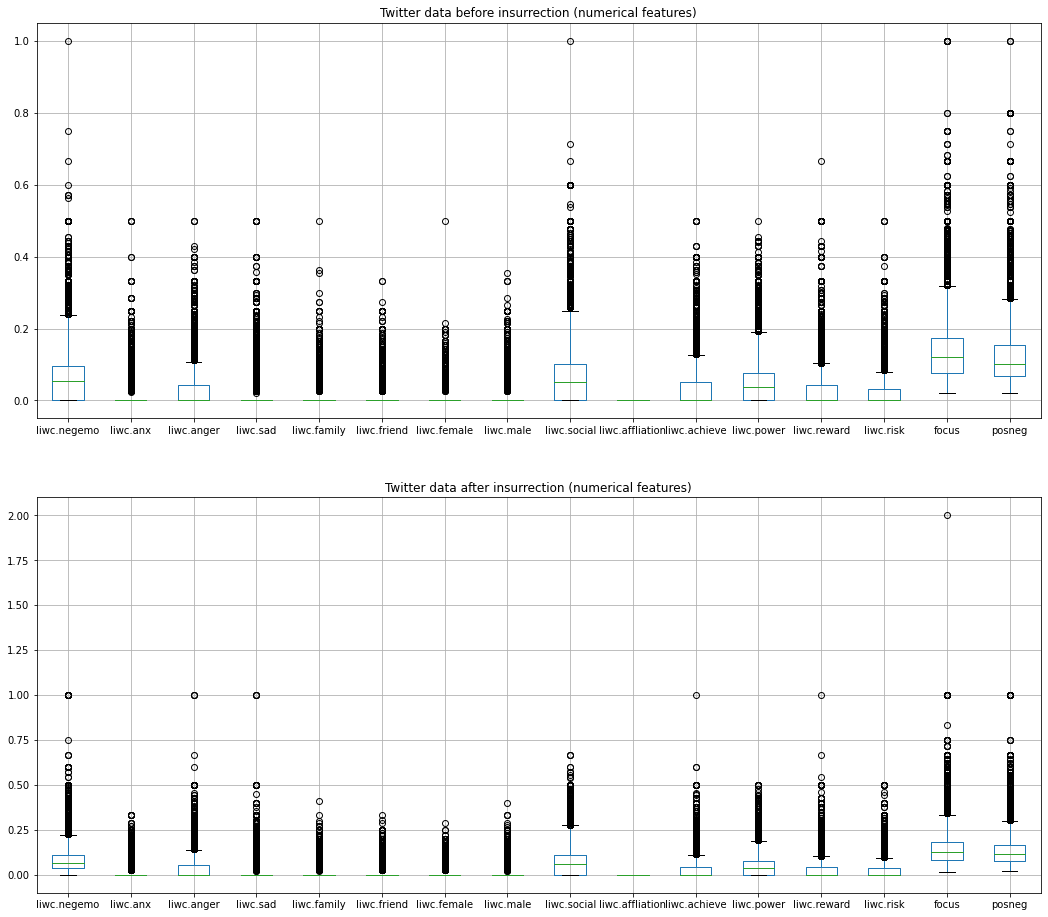

In [51]:
f, ax = plt.subplots(2, figsize=(18, 16))
plt.subplot(2,1,1)
boxplot = tw_before_df.boxplot(column=tw_before_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot.set_title("Twitter data before insurrection (numerical features)")

plt.subplot(2,1,2)
boxplot2 = tw_after_df.boxplot(column=tw_after_df.describe().columns.to_list()[10:], figsize=(20,8))
boxplot2.set_title("Twitter data after insurrection (numerical features)")

### 3. Frequency of post over time

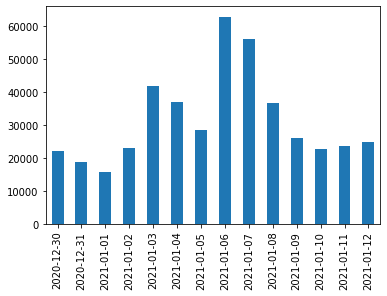

In [26]:
df_all_tw = [tw_before_df,tw_after_df ]
df_all_tw = pd.concat(df_all_tw)
df_all_tw['date_column'] = pd.to_datetime(df_all_tw['created_at']).dt.date
tw_freq = df_all_tw['date_column'].value_counts(sort = False)
date_plot = tw_freq.plot(kind='bar')

We can see that insurrection related tweets happen peaked during the insurrection date itself followed by the next day by just a slight decrease. 

### 4. Emotion (category data) share

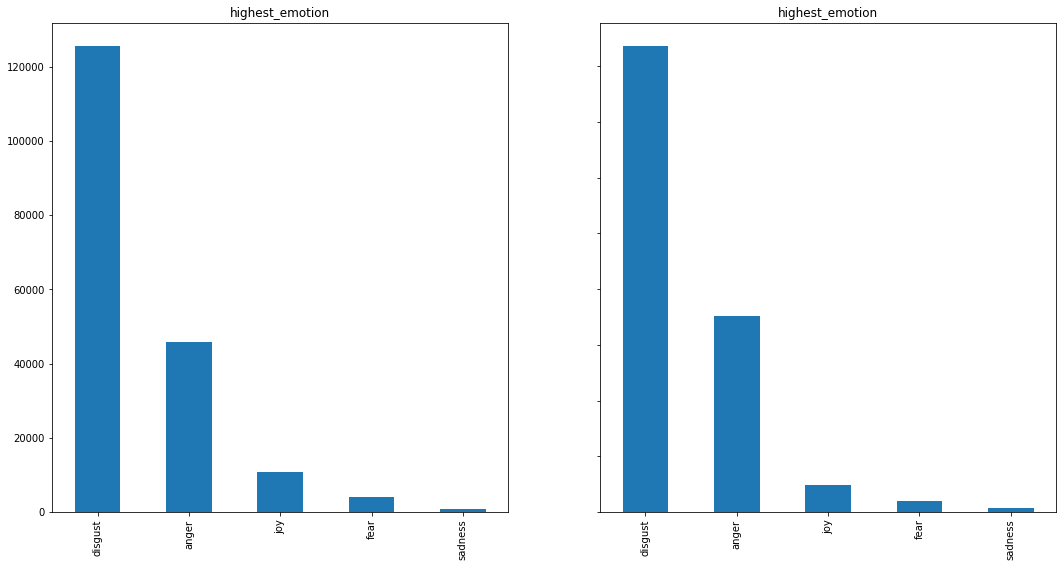

In [48]:
f, ax = plt.subplots(1,2, figsize=(18, 9))

plt.subplot(1,2,1)
before_emotion_count = tw_before_df['highest_emotion'].value_counts(sort = True)
before_emotion_plot = before_emotion_count.plot(kind='bar', subplots = True, sharey = True)

plt.subplot(1,2,2)
after_emotion_count = tw_after_df['highest_emotion'].value_counts(sort = True)
after_emotion_plot = after_emotion_count.plot(kind='bar', subplots = True, sharey = True)


Both before and after the insurrection, disgust is the most common emotion shown in these posts. We can see also more post showing anger after the insurrection in Twitter

### 5. Emotion values over time

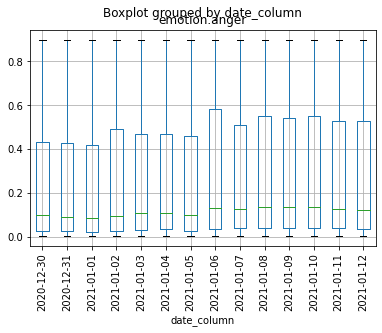

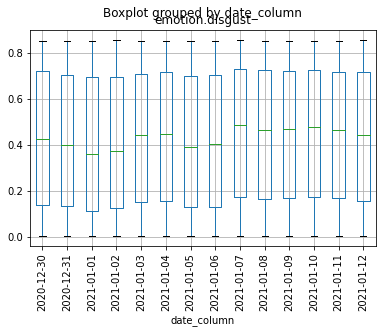

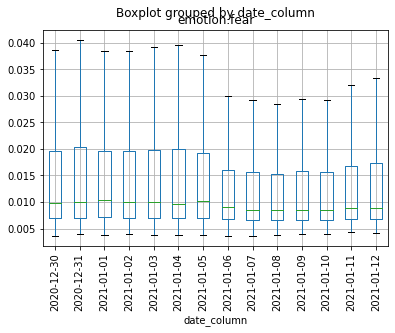

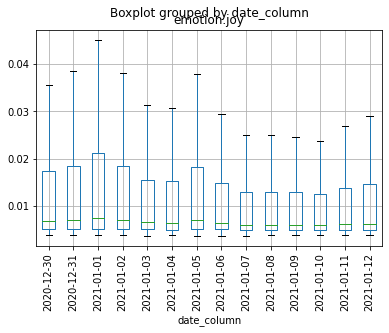

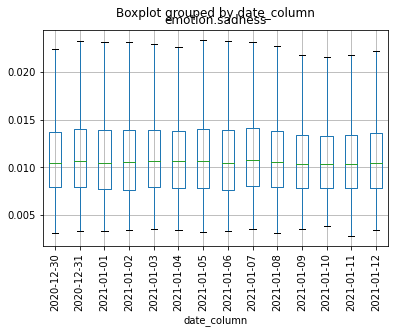

In [53]:
#check growth of each emotions per date (twitter)

boxplot_anger = df_all_tw.boxplot(column='emotion.anger', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_disgust = df_all_tw.boxplot(column='emotion.disgust', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_fear = df_all_tw.boxplot(column='emotion.fear', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_joy = df_all_tw.boxplot(column='emotion.joy', by='date_column', return_type='axes', showfliers=False, rot=90)
boxplot_sadness = df_all_tw.boxplot(column='emotion.sadness', by='date_column', return_type='axes', showfliers=False, rot=90)

From the box plot we can see that emotion values fluctuate before and after the insurrection. Anger in posts show a slight increase after the insurrection, there's a decrease of both fear, and joy after the insurrection, while the rest showed no discernible patterns 

### 6. Most common tweeting accounts

In [34]:
#most common twitter accounts
df_all_tw['author_id'].value_counts().head()



DarleneLewis100 (Darlene Lewis)            1023
Mary81245418 (Mary)                        1009
TonyHussein4 (Tony Hussein #Vaccinated)     598
APH48 (Albert P. Hernandez)                 467
Gtv_Luna (Luna 🇦🇺)                          449
Name: author_id, dtype: int64

### 7. Occurrence of negative and positive sayings

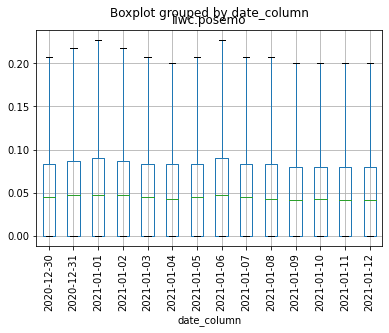

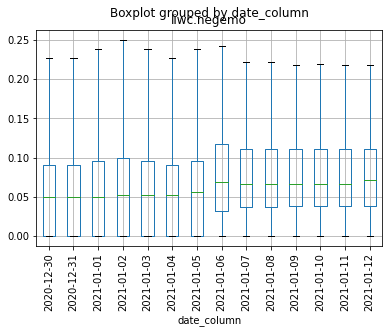

In [52]:
#occurrence of positive words
boxplot_positive = df_all_tw.boxplot(column='liwc.posemo', by='date_column', return_type='axes', showfliers=False, rot=90)
#occurrence of negative words
boxplot_negative = df_all_tw.boxplot(column='liwc.negemo', by='date_column', return_type='axes', showfliers=False, rot=90)

We can see that appearance of negative emotion words increased after the insurrection while  positive emotion words showed a slight decline.
